# **kMeans 알고리즘을 적용하여 확인적 군집분석을 수행하시오.**
>변수 설명 ) tot_price : 총구매액, buy_count : 구매횟수,
                   visit_count : 매장방문횟수, avg_price : 평균구매액

In [1]:
#필요한 모듈 불러오기
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score

## 1) 데이터 불러오기 및 탐색

In [2]:
sales = pd.read_csv("C:/Users/User/Desktop/2024-1/ESAA/사용 데이터/product_sales.csv")
print(sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   tot_price    150 non-null    float64
 1   visit_count  150 non-null    float64
 2   buy_count    150 non-null    float64
 3   avg_price    150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None


In [3]:
print(sales.shape)
print(type(sales))

(150, 4)
<class 'pandas.core.frame.DataFrame'>


## 2) KMeans 를 이용하여 3개의 군집으로 군집화

2-1) KMeans 모델을 생성하세요. 군집은 3개로 군집화하세요.

In [4]:
#모델 생성
kmeans=KMeans(n_clusters=3, init='k-means++')
#  max_iter=300, random_state=0, n_init=10

2-2) 모델을 훈련하고 예측치 생성하고 이 결과를 pred라는 변수에 저장하세요.

In [5]:
kmeans.fit(sales)
pred=kmeans.predict(sales)

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


2-3) 원형 데이터(scale)에 예측치(변수명:cluster)를 추가하세요.

In [6]:
sales['cluster']=pred
sales.head()

,tot_price,visit_count,buy_count,avg_price,cluster
0,5.0,0.2,3.0,1.6,1
1,5.0,0.4,3.4,1.6,1
2,5.2,0.2,3.5,1.5,1
3,5.2,0.2,3.0,1.4,1
4,4.7,0.2,3.2,1.6,1


## 3) 군집화 시각화
: 전체 데이터를 2차원으로 축소한 뒤 시각화하세요.

3-1) cluster 변수를 제외한 sales 데이터를 salesDF라는 이름으로 변수에 저장하세요.

In [7]:
salesDF=sales.drop('cluster', axis=1)
salesDF.head()

,tot_price,visit_count,buy_count,avg_price
0,5.0,0.2,3.0,1.6
1,5.0,0.4,3.4,1.6
2,5.2,0.2,3.5,1.5
3,5.2,0.2,3.0,1.4
4,4.7,0.2,3.2,1.6


3-2) salesDF 데이터를 이용하여 2차원으로 차원축소 한 후 그 결과를 sales에 pca_x, pca_y 이름으로 저장하세요.

In [8]:
#차원 축소 한 후 변형된 값 임의의 변수에 저장
pca=PCA(n_components=2)
pca_transformed=pca.fit_transform(salesDF)

#sales에 'pca_x', 'pca_y' 이름으로 열 만들어 저장
sales['pca_x']=pca_transformed[:, 0]
sales['pca_y']=pca_transformed[:, 1]
sales.head(3)

,tot_price,visit_count,buy_count,avg_price,cluster,pca_x,pca_y
0,5.0,0.2,3.0,1.6,1,-2.516330,-0.074159
1,5.0,0.4,3.4,1.6,1,-2.466679,0.231335
2,5.2,0.2,3.5,1.5,1,-2.557365,0.456400


3-3) pca_x를 x축, pca_y를 y축으로 하여 산점도를 그리세요. 색으로 각 점이 군집에 따라 구분되도록 하세요. (단, 각 군집별로 마커 모양 구분하지 않고 오직 색으로만 구분합니다.)

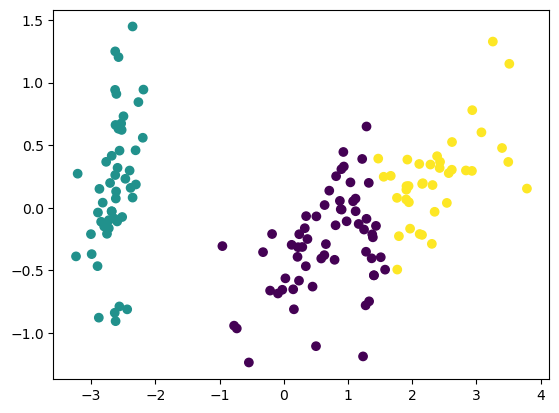

In [12]:
plt.scatter(sales['pca_x'], sales['pca_y'], c=sales['cluster'])

## 4) 군집평가: 실루엣 계수 구하기

In [13]:
#시각화를 위하여 사용했던 차원 축소 관련 계수 삭제
sales=sales.drop(['pca_x','pca_y'], axis=1)

#cluster 행을 제외한 순수 데이터 sales_data로 저장
sales_data=sales.drop('cluster', axis=1)

4-1) sales의 모든 데이터에 실루엣 계수를 구하고 실루엣 계수 칼럼을 추가하세요.

In [15]:
#sales의 모든 데이터에 실루엣 계수 구하기
score_samples=silhouette_samples(sales, sales['cluster'])
score_samples

array([0.80074438, 0.81247468, 0.81567689, 0.79780459, 0.80927973,
       0.81102579, 0.75553035, 0.73335664, 0.69586425, 0.82100525,
       0.82193816, 0.77524775, 0.82100525, 0.77101792, 0.82738509,
       0.82354018, 0.67232181, 0.781192  , 0.77902773, 0.7223799 ,
       0.81016125, 0.78232238, 0.81078745, 0.78930657, 0.83457812,
       0.44695155, 0.62945352, 0.49178775, 0.67799043, 0.63462565,
       0.71860658, 0.64631398, 0.31705014, 0.60898582, 0.63058956,
       0.40294089, 0.71500708, 0.65280763, 0.68921173, 0.59393819,
       0.58215968, 0.69738166, 0.70737713, 0.69134633, 0.67004818,
       0.61078664, 0.70391786, 0.60815841, 0.67059006, 0.67182624,
       0.61909493, 0.52129135, 0.55427404, 0.71643894, 0.53968764,
       0.62702277, 0.58372779, 0.70214119, 0.59637999, 0.67409439,
       0.62893395, 0.54634344, 0.64897816, 0.70892038, 0.69682916,
       0.70220586, 0.69569683, 0.71705282, 0.33952647, 0.72533599,
       0.71389991, 0.72696648, 0.7051316 , 0.16886445, 0.72790

In [16]:
#sales에 실루엣 계수 칼럼 추가
sales['silhouette_coeff']=score_samples

4-2) 모든 데이터의 평균 실루엣 계수를 구하세요.

In [17]:
#모든 데이터의 평균 실루엣 계수 값을 구하기
average_score=silhouette_score(sales, sales['cluster'])
print('sales 데이터 세트 Silhouette Analysis Score : {0:.3f}'.format(average_score))

sales 데이터 세트 Silhouette Analysis Score : 0.670


4-3) 군집별 평균 실루엣 계수를 구하세요.

In [18]:
#군집별 평균 실루엣 계수 구하기
sales.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.612467
1    0.765230
2    0.642197
Name: silhouette_coeff, dtype: float64